In [2]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
x = wine.data
y = wine.target

In [5]:
import sklearn.preprocessing
x = sklearn.preprocessing.StandardScaler().fit_transform(x)

In [6]:
x.shape

(178, 13)

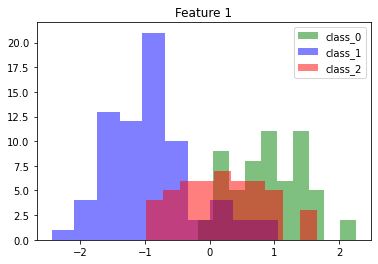

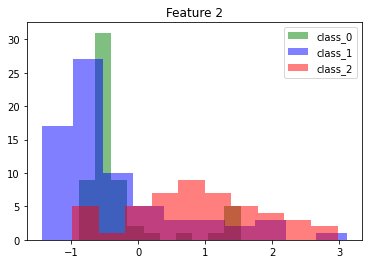

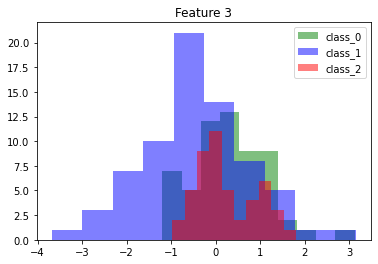

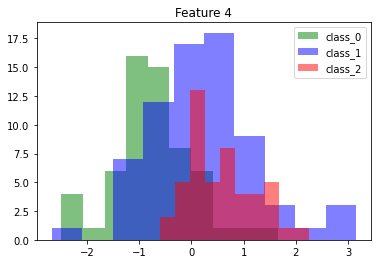

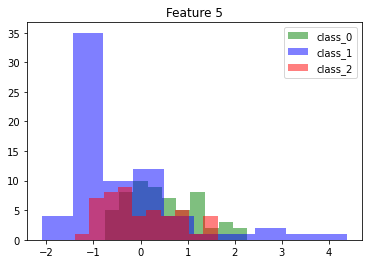

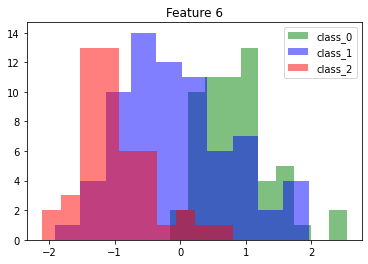

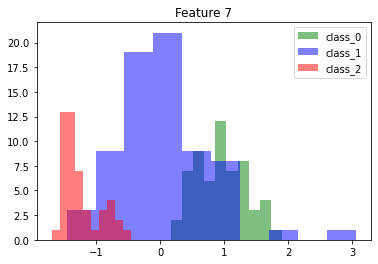

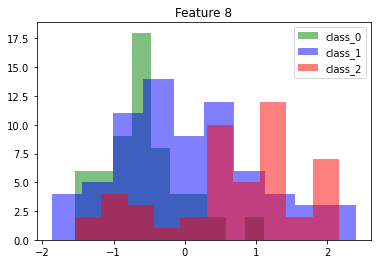

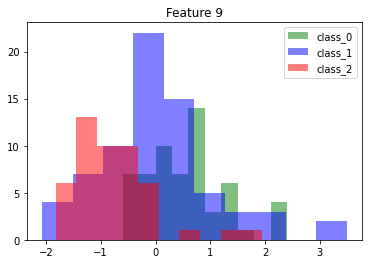

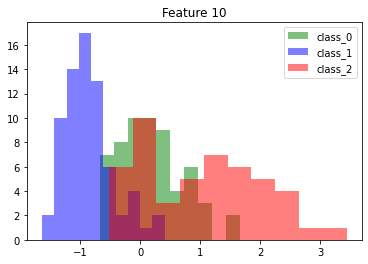

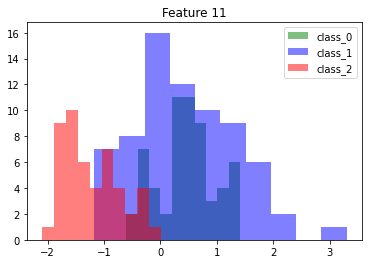

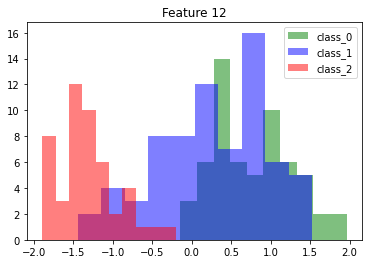

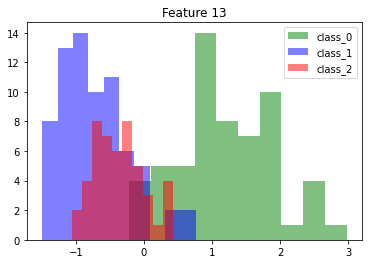

In [7]:
import matplotlib.pyplot as plt

for i in range(x.shape[1]):
    plt.hist(x[(y==0),i], alpha=0.5, color='green', label='class_0')
    plt.hist(x[(y==1),i], alpha=0.5, color='blue', label='class_1')
    plt.hist(x[(y==2),i], alpha=0.5, color='red', label='class_2')
    plt.title('Feature {}'.format(i+1))
    plt.legend()
    plt.show()

In [8]:
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as metrics

In [9]:
model = lm.LogisticRegression()

In [10]:
model.fit(x[:,0].reshape(-1,1),y)

LogisticRegression()

In [11]:
import numpy as np

In [12]:
x[:,0]

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

In [13]:
x_train, x_test, y_train, y_test = ms.train_test_split(
    x[:,0], y, test_size=0.2, random_state=42)

x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

model.fit(x_train_transformed,
          y_train)

predictions = model.predict(x_test_transformed)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[14  0  0]
 [ 0 13  1]
 [ 5  1  2]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.93      0.93      0.93        14
           2       0.67      0.25      0.36         8

    accuracy                           0.81        36
   macro avg       0.78      0.73      0.71        36
weighted avg       0.80      0.81      0.77        36



In [14]:
col_num = x.shape[1]


x_train, x_test, y_train, y_test = ms.train_test_split(
    x, y, test_size=0.2)


model.fit(x_train,
        y_train)

predictions = model.predict(x_test)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[11  0  0]
 [ 0 17  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [15]:
from collections import Counter
from itertools import combinations

col_num = x.shape[1]
cnum_list = list(range(col_num))
combinations_list = list(combinations(cnum_list, 2))

In [40]:
c_names = wine.feature_names

In [46]:
c_names[11] = 'percent_of_diluted_wines'

In [47]:
c_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'percent_of_diluted_wines',
 'proline']

In [50]:
import pandas as pd

In [ ]:
for c in combinations_list:

    x_1 = x[:,[c[0],c[1]]]

    model = lm.LogisticRegression()

    x_train, x_test, y_train, y_test = ms.train_test_split(
        x_1, y, test_size=0.2
        )

    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)

    score = metrics.accuracy_score(y_test, y_pred)

    if score >= 0.9:
        print('{} and {}'.format(c_names[c[0]], c_names[c[1]]))
        #print(c_names[c[0]], c_names[c[1]])
        print('Accuracy Score: {:.2f}% \n'.format(score*100))

In [153]:
i = 0
results = {}
n = 10

for n in range(n):
    for c in combinations_list:

        x_1 = x[:,[c[0],c[1]]]

        model = lm.LogisticRegression()

        x_train, x_test, y_train, y_test = ms.train_test_split(
            x_1, y, test_size=0.2
            )

        model.fit(x_train,y_train)

        y_pred = model.predict(x_test)

        score = metrics.accuracy_score(y_test, y_pred)

        if score >= 0.9:
            results[i] = (c[0],c[1])
            i += 1

In [154]:
counter = Counter(results.values())

In [157]:
num = len(results)
den = len(combinations_list)*n

print('Samples matching parameters: {:.2f}%'.format((num/den)*100))

Samples matching parameters: 8.40%


In [158]:
for i in counter.most_common(5):
    print('{} and {}: {} matches'.format(c_names[i[0][0]], c_names[i[0][1]], i[1]))

alcohol and flavanoids: 9 matches
color_intensity and percent_of_diluted_wines: 7 matches
color_intensity and proline: 6 matches
alcohol and hue: 4 matches
total_phenols and color_intensity: 4 matches


In [165]:
len(x_1)

178

In [ ]:
import sklearn.neighbors as nn

x_1 = x[:,[0,6]]

n = int(len(x_1)*.8)

res = {}

for i in range(1,n):

    model = nn.KNeighborsClassifier(n_neighbors=i)

    x_train, x_test, y_train, y_test = ms.train_test_split(
        x_1, y, test_size=0.2
        )

    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)

    a_score = metrics.accuracy_score(y_test, y_pred)
    p_score = metrics.precision_score(y_test, y_pred, average='macro')
    r_score = metrics.recall_score(y_test, y_pred, average='macro')
    res[i] = {'a_score' : a_score, 'p_score' : p_score, 'r_score' : r_score}


In [243]:
results = pd.DataFrame(res).transpose()

In [244]:
results['a_score'].argmax()

7

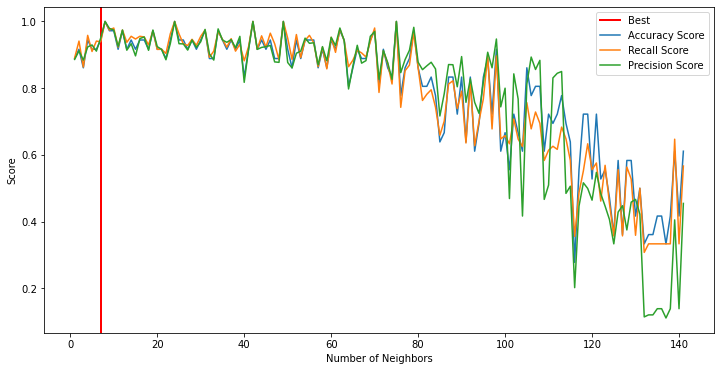

In [246]:
plt.figure(figsize=(12,6))
plt.axvline(results['a_score'].argmax(),color='red',linewidth=2)
plt.plot(results['a_score'])
plt.plot(results['r_score'])
plt.plot(results['p_score'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend(['Best','Accuracy Score', 'Recall Score', 'Precision Score'])
plt.show()

In [213]:
res.max(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 0

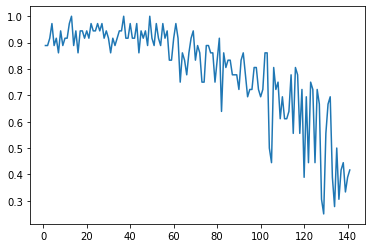

In [207]:
plt.plot(res[:,0], res[:,1])